In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/v2_second_collection_2022.csv')

In [3]:
df

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


In [4]:
df.columns

Index(['id', 'name', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object',
       'absolute_magnitude', 'hazardous'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [6]:
df['hazardous'].value_counts()

hazardous
False    81996
True      8840
Name: count, dtype: int64

В данных наблюдается серьезный дисбаланс классов.

In [7]:
df.nunique()

id                    27423
name                  27423
est_diameter_min       1638
est_diameter_max       1638
relative_velocity     90828
miss_distance         90536
orbiting_body             1
sentry_object             1
absolute_magnitude     1638
hazardous                 2
dtype: int64

In [8]:
df.drop_duplicates()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


In [9]:
df.replace({True: 1, False: 0}, inplace=True)

In [10]:
def check_missing(dataset):
    result = pd.concat([dataset.isnull().sum(), dataset.isnull().mean()], axis = 1)
    result = result.rename(index = str, columns={0: 'total_missing', 1: 'proportion'})
    return result

In [11]:
check_missing(df)

,total_missing,proportion
id,0,0.0
name,0,0.0
est_diameter_min,0,0.0
est_diameter_max,0,0.0
relative_velocity,0,0.0
miss_distance,0,0.0
orbiting_body,0,0.0
sentry_object,0,0.0
absolute_magnitude,0,0.0
hazardous,0,0.0


In [12]:
df = df.drop(['id', 'name', 'sentry_object', 'orbiting_body'], axis = 1)

<Axes: >

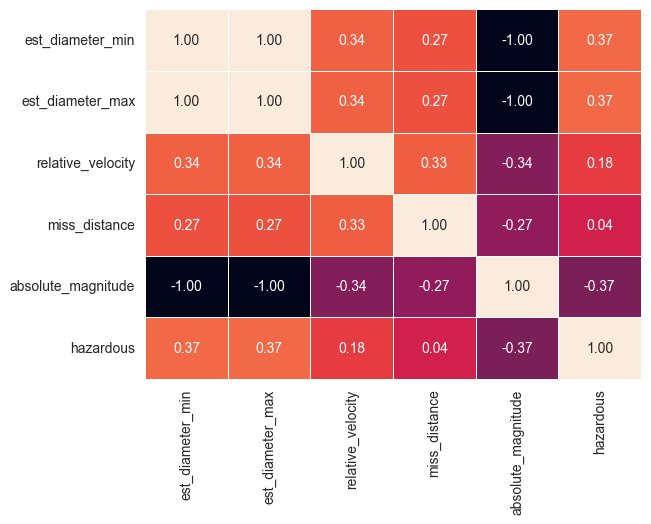

In [13]:
sns.heatmap(df.corr(method='spearman'), annot=True, cbar=False, linewidths=.5, fmt= '.2f')

При вызове функции корреляции видно, что признаки est_diameter_min/max положительную монотонную связь, а также эти признаки имеют отрицательную монотонную связь с признаком miss_distance. Поэтому, чтобы избавиться от дублирующей информации, сохраним только признак miss_distance

In [17]:
df = df.drop(['est_diameter_min', 'est_diameter_max'], axis=1)

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
relative_velocity,90836.0,4.806692e+04,2.529330e+04,203.346433,2.861902e+04,4.419012e+04,6.292360e+04,2.369901e+05
miss_distance,90836.0,3.706655e+07,2.235204e+07,6745.532516,1.721082e+07,3.784658e+07,5.654900e+07,7.479865e+07
absolute_magnitude,90836.0,2.352710e+01,2.894086e+00,9.230000,2.134000e+01,2.370000e+01,2.570000e+01,3.320000e+01
hazardous,90836.0,9.731824e-02,2.963923e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [19]:
def drop_outliers(dataset, outliers_index):
    data_copy = dataset[~dataset.index.isin(outliers_index)]
    return data_copy

In [20]:
df.select_dtypes('number').columns

Index(['relative_velocity', 'miss_distance', 'absolute_magnitude',
       'hazardous'],
      dtype='object')

In [21]:
def outlier_detect_IQR(dataset, columns, threshold=3):
    outlier_indices = []
    outliers = []

    for col in columns:
        IQR = dataset[col].quantile(0.75) - dataset[col].quantile(0.25)
        lower_fence = dataset[col].quantile(0.25) - (IQR * threshold)
        upper_fence = dataset[col].quantile(0.75) + (IQR * threshold)
        param = (upper_fence, lower_fence)
        tmp = pd.concat([dataset[col] > upper_fence, dataset[col] < lower_fence], axis=1)
        outlier_index = tmp.any(axis=1)

        outlier_indices.extend(outlier_index[outlier_index].index)
        outliers.extend(dataset.loc[outlier_index, col])

        print(f'Number of outliers in {col}:', outlier_index.sum())
        print(f'Outlier share in {col}:', outlier_index.sum() / len(outlier_index))

    return outlier_indices


In [22]:
outlier_indices = outlier_detect_IQR(dataset=df, columns=['relative_velocity',
       'miss_distance', 'absolute_magnitude'], threshold=3)

Number of outliers in relative_velocity: 33
Outlier share in relative_velocity: 0.0003632920868378176
Number of outliers in miss_distance: 0
Outlier share in miss_distance: 0.0
Number of outliers in absolute_magnitude: 0
Outlier share in absolute_magnitude: 0.0


In [23]:
len(outlier_indices)

33

D:\courses\module4\homework4\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


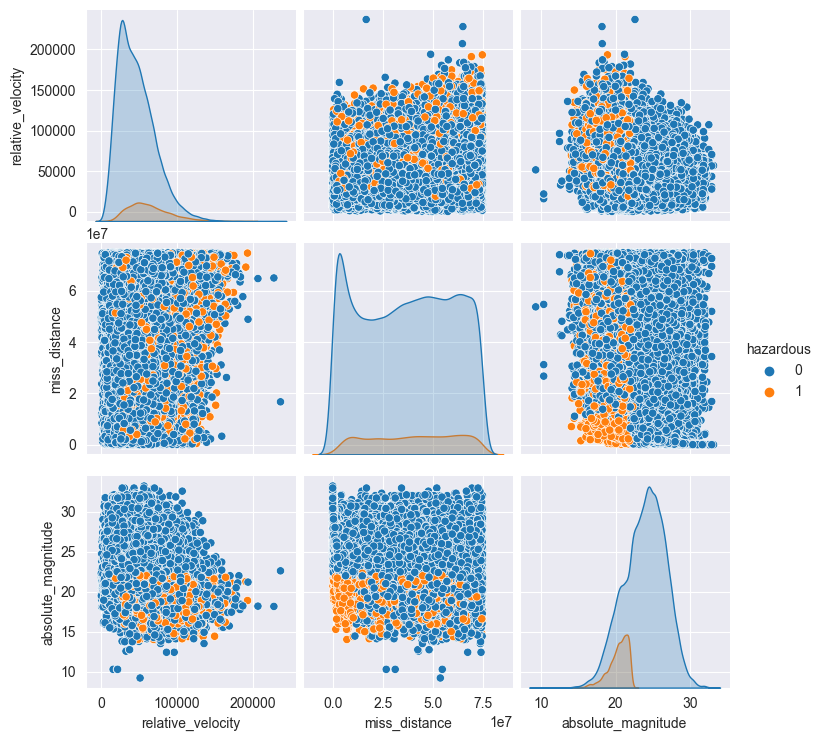

In [24]:
sns.pairplot(data = df, hue = 'hazardous')

Данные не являются линейно разделимыми

In [25]:
df_clean = drop_outliers(dataset=df, outliers_index=outlier_indices)

In [26]:
df_clean

,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,13569.249224,5.483974e+07,16.73,0
1,73588.726663,6.143813e+07,20.00,1
2,114258.692129,4.979872e+07,17.83,0
3,24764.303138,2.543497e+07,22.20,0
4,42737.733765,4.627557e+07,20.09,1
...,...,...,...,...
90831,52078.886692,1.230039e+07,25.00,0
90832,46114.605073,5.432121e+07,26.00,0
90833,7566.807732,2.840077e+07,24.60,0
90834,69199.154484,6.869206e+07,27.80,0


In [27]:
num_df = ['relative_velocity','miss_distance','absolute_magnitude']

In [28]:
def boxplot(df, target):
    num_df = list(df.select_dtypes('number').columns)
    for k in num_df:
        plt.figure(figsize=(10,4))
        sns.boxplot(data=df, x=k, y=target, orient='h')
        title = k
        plt.title(title)
        plt.grid()

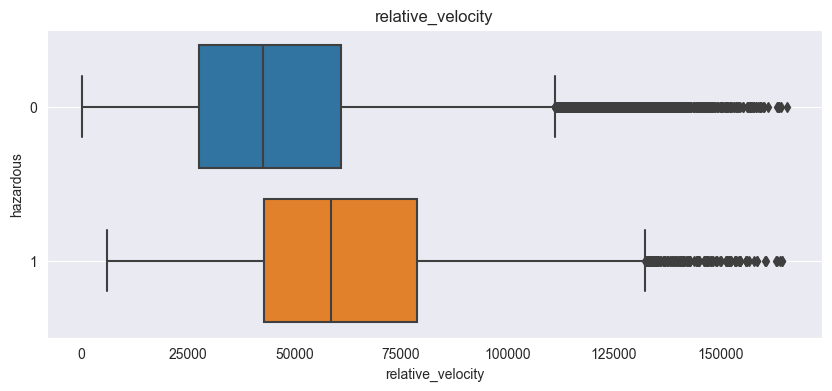

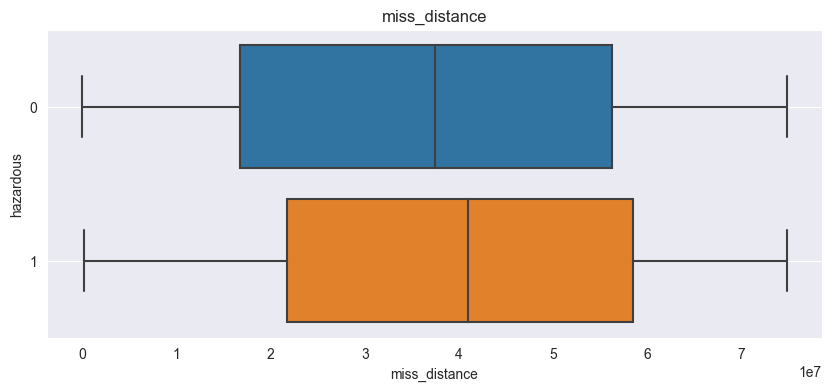

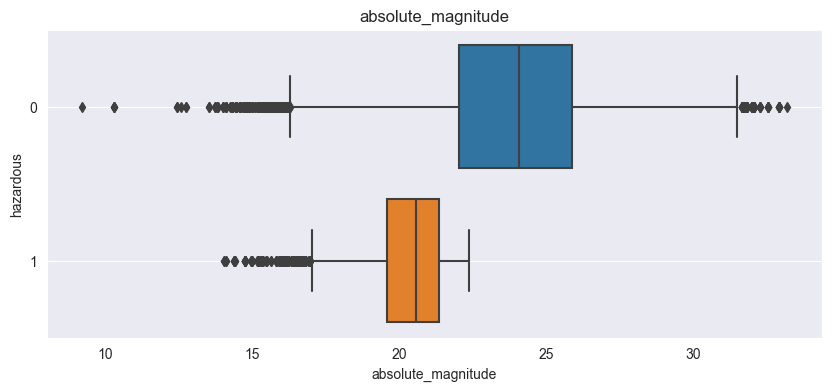

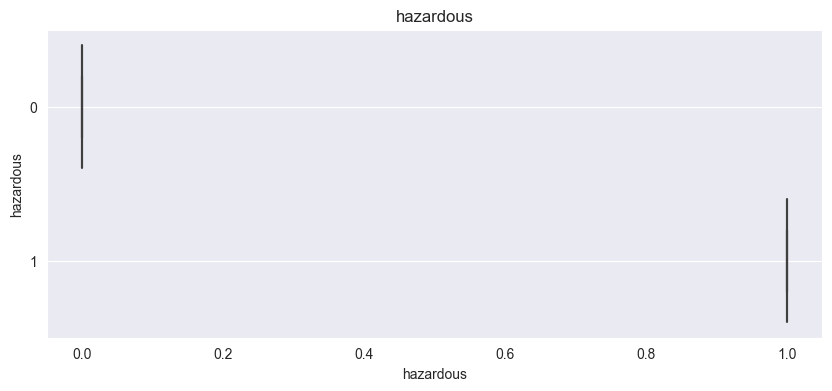

In [29]:
boxplot(df_clean, 'hazardous')

In [31]:
def compare_dist_hazard(df):
    numeric_columns = df.select_dtypes(include='number').columns

    for column in numeric_columns:
        f, ax = plt.subplots(figsize=(6, 5))
        ax = sns.kdeplot(df.loc[df['hazardous'] == 0, column], ax=ax, label='Not Hazardous')
        ax = sns.kdeplot(df.loc[df['hazardous'] == 1, column], ax=ax, label='Hazardous')
        ax.set_xlabel('')
        ax.set_yticklabels([])
        ax.set_title(column + ' grouped by hazardous')
        ax.legend()
        plt.show()

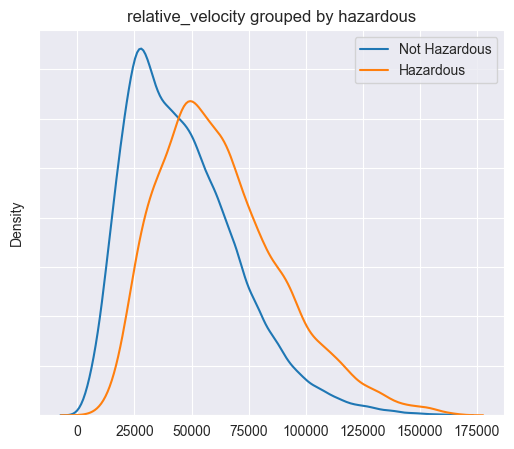

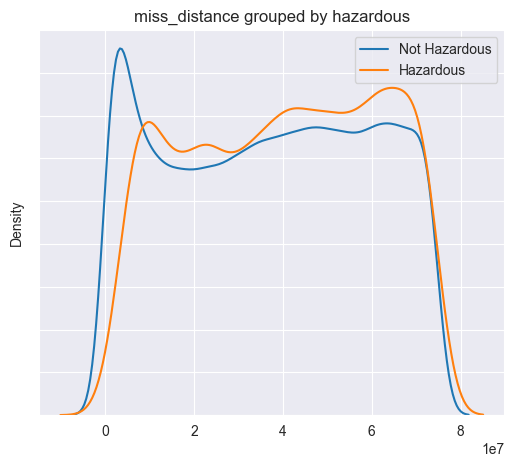

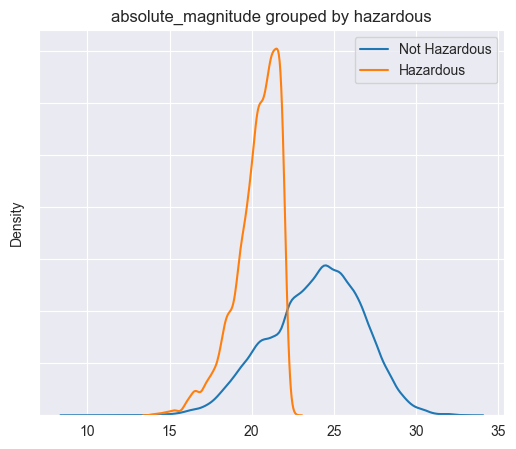

C:\Users\maxto\AppData\Local\Temp\ipykernel_18036\1434762217.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  ax = sns.kdeplot(df.loc[df['hazardous'] == 0, column], ax=ax, label='Not Hazardous')
C:\Users\maxto\AppData\Local\Temp\ipykernel_18036\1434762217.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  ax = sns.kdeplot(df.loc[df['hazardous'] == 1, column], ax=ax, label='Hazardous')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


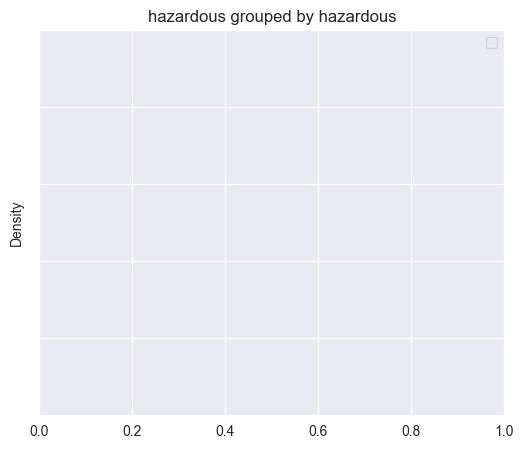

In [32]:
compare_dist_hazard(df_clean)

Из графического анализа видно, что опасные астероиды обладают немного более высокой относительной скоростью(relative_velocity) и схожей miss_distance. При анализе признака величины астероида (absolute_magnitude) можно увидеть, что существует граница, при которой астероид перестает быть опасным. Скорее всего данный признак будет самым важным для модели.

In [33]:
df_clean

,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,13569.249224,5.483974e+07,16.73,0
1,73588.726663,6.143813e+07,20.00,1
2,114258.692129,4.979872e+07,17.83,0
3,24764.303138,2.543497e+07,22.20,0
4,42737.733765,4.627557e+07,20.09,1
...,...,...,...,...
90831,52078.886692,1.230039e+07,25.00,0
90832,46114.605073,5.432121e+07,26.00,0
90833,7566.807732,2.840077e+07,24.60,0
90834,69199.154484,6.869206e+07,27.80,0


In [34]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

In [35]:
X = df_clean.drop(columns='hazardous')
y = df_clean.hazardous

In [36]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df_clean['hazardous'])

In [37]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42, stratify=y_temp)

In [38]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_scaled, y_train)

In [40]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)

X_over, y_over = over.fit_resample(X_train_scaled, y_train)
print(f"Oversampled: {Counter(y_over)}")

X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)
print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")

Oversampled: Counter({0: 59019, 1: 29509})
Combined Random Sampling: Counter({0: 36886, 1: 29509})


In [41]:
y_combined_sampling.value_counts()

hazardous
0    36886
1    29509
Name: count, dtype: int64

In [42]:
def quality_report(prediction, actual):
    print("Accuracy: {:.3f}\nPrecision: {:.3f}\nRecall: {:.3f}\nf1_score: {:.3f}".format(
        accuracy_score(actual, prediction),
        precision_score(actual, prediction),
        recall_score(actual, prediction),
        f1_score(actual, prediction)
    ))

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
from sklearn.metrics import roc_auc_score, roc_curve
def plot_roc_curve(prob_prediction, actual):
    fpr, tpr, thresholds = roc_curve(actual, prob_prediction)
    auc_score = roc_auc_score(actual, prob_prediction)

    plt.plot(fpr, tpr, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC: {:.3f}'.format(auc_score))
    plt.show()

In [45]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [71]:
svc = SVC(kernel='rbf',probability=True)
svc.fit(X_res, y_res)

SVC(probability=True)

In [72]:
print("Train quality")
quality_report(svc.predict(X_res), y_res)
print("\nTest quality")
quality_report(svc.predict(X_test_scaled), y_test)

Train quality
Accuracy: 0.871
Precision: 0.796
Recall: 0.996
f1_score: 0.885

Test quality
Accuracy: 0.764
Precision: 0.290
Recall: 0.988
f1_score: 0.449


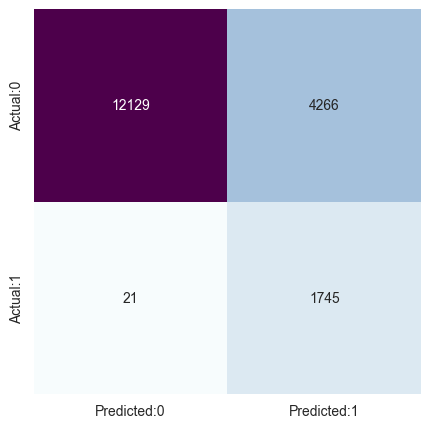

In [73]:
cm = confusion_matrix(y_test, svc.predict(X_test_scaled))
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
plt.figure(figsize = (5,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="BuPu", cbar=False);

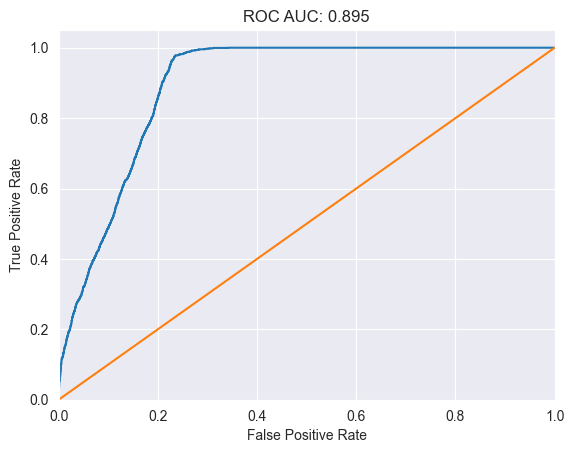

In [74]:
plot_roc_curve(svc.predict_proba(X_test_scaled)[:, 1], y_test)

Text(0.5, 0, 'Permutation Importance')

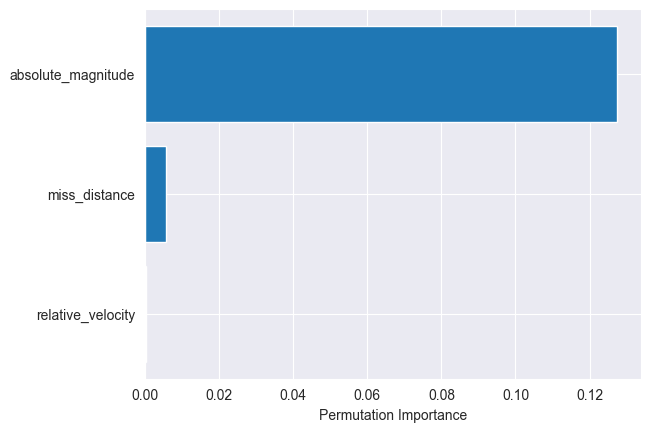

In [75]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(svc, X_test_scaled, y_test)
features = np.array(['relative_velocity', 'miss_distance', 'absolute_magnitude'])
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [76]:
import pickle
filename = 'tokarev_finalized_model.pkl'
pickle.dump(svc, open(filename, 'wb'))

In [78]:
X_val_scaled = scaler.transform(X_val)
print("\nTest quality:")
quality_report(svc.predict(X_val_scaled), y_val)


Test quality:
Accuracy: 0.774
Precision: 0.300
Recall: 0.993
f1_score: 0.461


In [89]:
df_clean[df_clean['absolute_magnitude']<22].hazardous.value_counts(normalize=True)

hazardous
0    0.697471
1    0.302529
Name: proportion, dtype: float64

Метрикой качества в данной работе будет являться recall, так как в данной задаче классификации опасных астероидов лучше совершить ошибку I рода, чем пропустить опасный астероид. Из протестированных моделей наилучший показатель по метрике Recall был достигнут при использовании модели Support Vector Classifier. После проведения балансировки классов и обучения модели, был достигнут Recall более 99%, однако из-за исходного дисбаланса классов модель обладает низким Precision. Низкий Precision также можно объяснить тем, что важнейшим признаком для модели является absolute_magnitude, по которому можно классифицировать большинство наблюдений, однако с наблюдениями, что обладают меньшей absolute_magnitude, чем 22 (графический анализ), модель справляется хуже, так как распределения опасных и неопасных объектов для оставшихся признаков достаточно схожее. Таким образом наиболее опасными объектами являются объекты с абсолютной звездной величиной менее 22, вероятность приближения такого объекта к околоземной орбите ~30%